## Observations and Insights 

#  Observations 

The Drug regimen of Capomulin was effective in reducing the average SCC tumor volume in mice over a 45 day period. It would be interesting to continue the study past 45 days to see if the tumor would be completely ablated.

The number of data points for each Drug Regimen were all above 100 - usually statistical significance is obtained with a sample size of 30 or greater.


The study had a near identical number of male and female mice. Determining if sex of the mouse was correlated to efficacy would be interesting to look at.

Based on average final tumor volume both Capomulin and Ramicane appeared to be equally effective, but to be sure of this we would need to make sure the starting tumor volumes were equivalent. Of these four drugs of interest (Capomulin, Ramicane, Infubinol, and Ceftamin) only Infubinol had one outlier data point - the rest were "well behaved" with the datasets not having any outliers.

Mouse weight correlated strongly (R-squared of 0.84) with average tumor volume. Therefore correlating only the final tumor volume to efficacy without controlling for mouse weight could skew the interpretation of efficacy.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata,study_results, on ="Mouse ID", how= "outer")

# Display the data table for preview
total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(total_data["Mouse ID"].unique())
mice_count


249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_df= total_data[total_data[["Mouse ID","Timepoint"]].duplicated()]
duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice_df= total_data.loc[total_data["Mouse ID"] == "g989"]

duplicate_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_mouse_df = total_data.loc[total_data["Mouse ID"] != "g989"]
new_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_count=len(new_mouse_df["Mouse ID"].unique())

new_mice_count


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_mean = new_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
mouse_median=new_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
mouse_variance = new_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
mouse_standard_deviation = new_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
mouse_SEM= new_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary dataframe.
summary_statistics = round(pd.DataFrame({"Mean":mouse_mean,"Median":mouse_median,"Variance":mouse_variance,"Standard Deviation":mouse_standard_deviation,"SEM":mouse_SEM}),2)
summary_statistics


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_table = round(new_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([("Mean","mean"),("Median", "median"),("Variance","var"),("Standard Deviation","std"),("SEM","sem")]),2)
summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

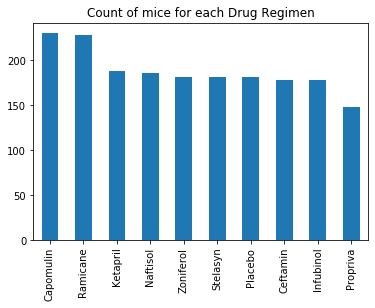

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_count = new_mouse_df["Drug Regimen"].value_counts()
drug_regimen_count.plot(kind ="bar",title="Count of mice for each Drug Regimen")




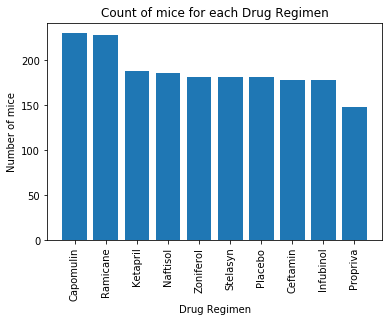

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_regimen_count.index.values,drug_regimen_count.values)
plt.ylabel("Number of mice")
plt.xlabel("Drug Regimen")
plt.title("Count of mice for each Drug Regimen")
plt.xticks(rotation=90)
plt.show()


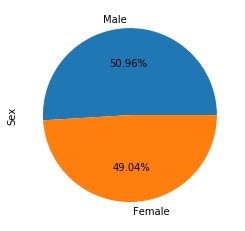

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_distribution = new_mouse_df["Sex"].value_counts()

gender_distribution.plot(kind = "pie", autopct ="%1.2f%%")



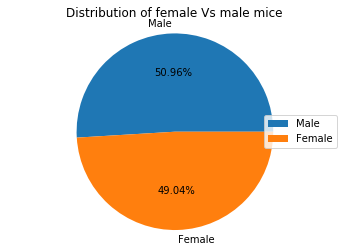

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female" ]
plt.pie(gender_distribution, labels=gender_distribution.index.values,autopct="%1.2f%%", )
plt.axis("equal")
plt.legend(loc ="right")
plt.title("Distribution of female Vs male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_regimens_df = new_mouse_df.loc[(new_mouse_df["Drug Regimen"] == "Capomulin")| 
                                         (new_mouse_df["Drug Regimen"] == "Ramicane")|
                                        (new_mouse_df["Drug Regimen"] == "Infubinol")|
                                        (new_mouse_df["Drug Regimen"] == "Ceftamin")]


# Start by getting the last (greatest) timepoint for each mouse

treatment_regimens_last_df = treatment_regimens_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(treatment_regimens_last_df,new_mouse_df, how ="left", on = ["Mouse ID","Timepoint"])
merged_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = list(merged_df["Drug Regimen"].unique())


# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

for treatment in treatment_list:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    #print treatments
    print ("------------------------------------------------")
    print (f"Treatment Name: {treatment}")
    print ("------------------------------------------------")

    #Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_df = merged_df.loc[merged_df["Drug Regimen"]== treatment,"Tumor Volume (mm3)"]
    tumor_volume_df
 
    # add subset 
    tumor_vol_data.append(tumor_volume_df) 
    
    quartiles = tumor_volume_df.quantile([.25,.5,.75])
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = (upperq-lowerq).round(2)

    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5].round(2)} ")
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")   
    
# Determine outliers using upper and lower bounds 
   
    print ("\n")
    low_outlier_occupancy = merged_df.loc[(merged_df["Tumor Volume (mm3)"] < lower_bound)&(merged_df["Drug Regimen"]==treatment) ]
    print (f"Low outliers for {treatment}:")
    print (low_outlier_occupancy.head())
    print ("\n")
    high_outlier_occupancy = merged_df.loc[(merged_df["Tumor Volume (mm3)"] > upper_bound)&(merged_df["Drug Regimen"]==treatment) ]
    print (f"High outliers for {treatment}:")
    print (high_outlier_occupancy.head())


------------------------------------------------
Treatment Name: Infubinol
------------------------------------------------
The lower quartile of occupancy is: 54.05
The upper quartile of occupancy is: 65.53
The interquartile range of occupancy is: 11.48
The the median of occupancy is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


Low outliers for Infubinol:
   Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
15     c326          5    Infubinol  Female          18          25   

    Tumor Volume (mm3)  Metastatic Sites  
15           36.321346                 0  


High outliers for Infubinol:
Empty DataFrame
Columns: [Mouse ID, Timepoint, Drug Regimen, Sex, Age_months, Weight (g), Tumor Volume (mm3), Metastatic Sites]
Index: []
------------------------------------------------
Treatment Name: Ceftamin
------------------------------------------------
The lower quartile of occupancy is: 48.72
The upper quartile of occupancy is: 6

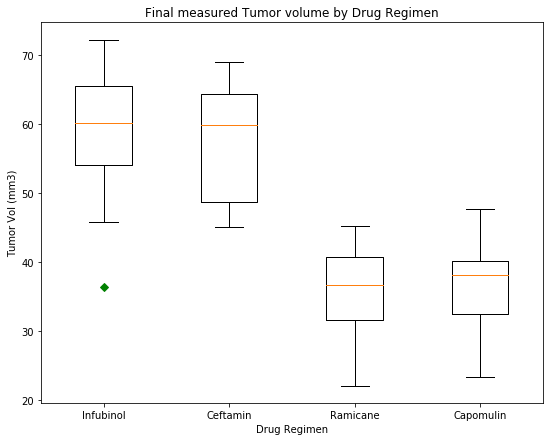

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(tumor_vol_data,notch=0,sym='gD')
plt.xticks([1,2,3,4],treatment_list)

# Save the figure


plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

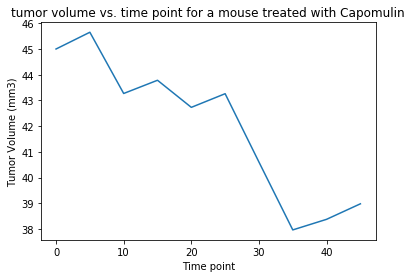

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_df_b128 = new_mouse_df.loc[(new_mouse_df["Drug Regimen"]== "Capomulin")& (new_mouse_df["Mouse ID"]=="b128")]

capomulin_volume = capomulin_df_b128.loc[capomulin_df_b128["Drug Regimen"]== "Capomulin","Tumor Volume (mm3)"]

capomulin_tumor_time = capomulin_df_b128.loc[capomulin_df_b128["Drug Regimen"]== "Capomulin","Timepoint"]

plt.plot(capomulin_tumor_time,capomulin_volume)
plt.title("tumor volume vs. time point for a mouse treated with Capomulin")
plt.xlabel("Time point")
plt.ylabel("Tumor Volume (mm3)")


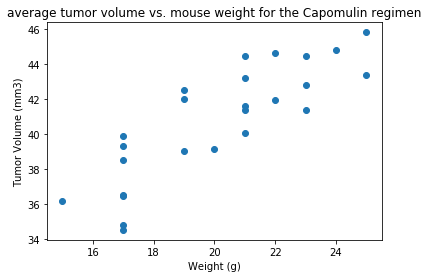

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = new_mouse_df.loc[new_mouse_df["Drug Regimen"]== "Capomulin"]
capomulin_weight_avg = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
capomulin_volume_avg = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.scatter(capomulin_weight_avg ,capomulin_volume_avg)
plt.title("average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

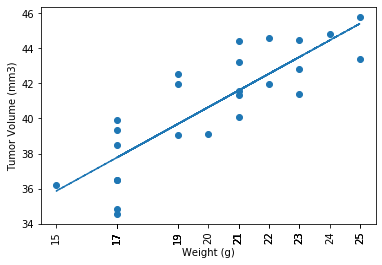

the correlation coefficient is: 0.8419363424694718


In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

m_slope, m_intercept, m_rvalue, m_pvalue, m_std_error = st.linregress(capomulin_weight_avg, capomulin_volume_avg)

m_fit = m_slope * capomulin_weight_avg + m_intercept
plt.scatter(capomulin_weight_avg, capomulin_volume_avg)
plt.plot(capomulin_weight_avg,m_fit,"--")
plt.xticks(capomulin_weight_avg, rotation=90)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
print (f"the correlation coefficient is: {m_rvalue}")


